# Importing Libraries

In [1]:
import torch
from torch import nn

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import colorsys
import random
from tabulate import tabulate
from termcolor import cprint

# Configuring Visualization Parameters

In [2]:
%matplotlib inline

In [3]:
XINHUI = '#7a7374'
XUEBAI = '#fffef9'
YINBAI = '#f1f0ed'
YINHUI = '#918072'

figure_size = (16, 9)

In [4]:
custom_params = {
    'axes.axisbelow': True,
    'axes.edgecolor': YINBAI,
    'axes.facecolor': XUEBAI,
    'axes.grid': True,
    'axes.labelcolor': XINHUI,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.titlecolor': XINHUI,
    'figure.edgecolor': YINBAI,
    'figure.facecolor': XUEBAI,
    'grid.alpha': .8,
    'grid.color': YINBAI,
    'grid.linestyle': '--',
    'grid.linewidth': 1.2,
    'legend.edgecolor': YINHUI,
    'patch.edgecolor': XUEBAI,
    'patch.force_edgecolor': True,
    'text.color': XINHUI,
    'xtick.color': YINHUI,
    'ytick.color': YINHUI,
}

mpl.rcParams.update(custom_params)

# Pre-installing Required Functions

In [5]:
def list_head_checker(list_1, list_2):
    for i in range(len(list_2)):
        if list_1[-1] == list_2[0]:
            head, list_2 = list_2[0], list_2[1:]
            list_2.append(head)
        else:
            break
    return list_2

In [6]:
def list_connector(list_1, list_2):
    if list_1 != []:
        list_2 = list_head_checker(list_1, list_2)
    list_1 += list_2
    return list_1

In [7]:
def color_list_generator(n=100):
    termcolors = [
        'grey', 'red', 'green', 'yellow', 'blue', 'magenta', 'cyan', 'white'
    ]
    global font_colors_list
    font_colors_list = []
    for i in range(((n - 1) // 8 + 1)):
        if n <= 8:
            random_list = random.sample(termcolors, k=n)
            list_connector(font_colors_list, random_list)
        else:
            if i < ((n - 1) // 8):
                random_list = random.sample(termcolors, k=8)
                list_connector(font_colors_list, random_list)
            else:
                k = n % 8
                if k == 0:
                    random_list = random.sample(termcolors, k=8)
                    list_connector(font_colors_list, random_list)
                elif k == 1:
                    random_list = random.sample(termcolors, k=2)
                    font_colors_list = list_connector(font_colors_list,
                                                      random_list)[:-1]
                else:
                    random_list = random.sample(termcolors, k=k)
                    list_connector(font_colors_list, random_list)

In [8]:
def font_color_printer(string, *args, **kwargs):
    global font_colors_list, previous_color
    try:
        font_colors_list
    except NameError:
        color_list_generator()
    if font_colors_list == []:
        color_list_generator()
    previous_color = font_colors_list.pop(0)
    return cprint(string, previous_color, *args, **kwargs)

In [9]:
def calm_color_generator(n):
    colors = []
    hue = np.repeat(np.random.random(), n)
    hue_interval = np.linspace(0, 1, n, endpoint=False)
    saturation = 0.6 + np.random.random() / 5.0 * np.random.choice([-1, 1])
    lightness = 0.5 + np.random.random() / 10.0 * np.random.choice([-1, 1])
    h = hue + hue_interval
    h = np.where(h > 1, h - 1, h)
    s = np.repeat(saturation, n)
    l = np.repeat(lightness, n)
    array_hls = np.concatenate((h, l, s)).reshape(-1, n).T
    for hls in array_hls:
        r, g, b = [
            int(256 * e) for e in colorsys.hls_to_rgb(hls[0], hls[1], hls[2])
        ]
        colors.append('#%02X%02X%02X' % (r, g, b))
    return colors

# Practicing in Stages

## Making Predictions

In [10]:
def forward(x):
    y = w * x + b
    return y


font_color_printer("Definition of the function of prediction",
                   attrs=['underline'],
                   end='\n\n')

table = [["Definition"],
         ["def forward(x):\n\ty = w * x + b\n\treturn y".expandtabs(4)]]
table_list = tabulate(table,
                      headers='firstrow',
                      tablefmt='pretty',
                      colalign=("left", )).split('\n')
for line in table_list:
    cprint('\t'.expandtabs(4) + line, previous_color, attrs=['bold'])

Definition of the function of prediction

    +-------------------+
    | Definition        |
    +-------------------+
    | def forward(x):   |
    |     y = w * x + b |
    |     return y      |
    +-------------------+


In [11]:
w = torch.tensor(3.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

font_color_printer("Initial assignment of parameters",
                   attrs=['underline'],
                   end='\n\n')

table = [["Statement"], ["w = torch.tensor(3.0, requires_grad=True)"],
         ["b = torch.tensor(1.0, requires_grad=True)"]]
table_list = tabulate(table,
                      headers='firstrow',
                      tablefmt='pretty',
                      colalign=("left", )).split('\n')
for line in table_list:
    cprint('\t'.expandtabs(4) + line, previous_color, attrs=['bold'])

table = [["Variable", "Value"], ["w", str(w)], ["b", str(b)]]
table_list = tabulate(table,
                      headers='firstrow',
                      tablefmt='pretty',
                      colalign=("left", "left")).split('\n')
for line in table_list:
    cprint('\t'.expandtabs(4) + line, previous_color, attrs=['bold'])

Initial assignment of parameters

    +-------------------------------------------+
    | Statement                                 |
    +-------------------------------------------+
    | w = torch.tensor(3.0, requires_grad=True) |
    | b = torch.tensor(1.0, requires_grad=True) |
    +-------------------------------------------+
    +----------+--------------------------------+
    | Variable | Value                          |
    +----------+--------------------------------+
    | w        | tensor(3., requires_grad=True) |
    | b        | tensor(1., requires_grad=True) |
    +----------+--------------------------------+


In [12]:
x = torch.tensor(2)

font_color_printer("Function implementation of 0D tensor",
                   attrs=['underline'],
                   end='\n\n')

table = [["Statement"], ["x = torch.tensor(2)"]]
table_list = tabulate(table,
                      headers='firstrow',
                      tablefmt='pretty',
                      colalign=("left", )).split('\n')
for line in table_list:
    cprint('\t'.expandtabs(4) + line, previous_color, attrs=['bold'])

table = [["Variable", "Value"], ["x", str(x)]]
table_list = tabulate(table,
                      headers='firstrow',
                      tablefmt='pretty',
                      colalign=("left", "left")).split('\n')
for line in table_list:
    cprint('\t'.expandtabs(4) + line, previous_color, attrs=['bold'])

table = [["Expression", "Result"], ["forward(x)", str(forward(x))]]
table_list = tabulate(table,
                      headers='firstrow',
                      tablefmt='pretty',
                      colalign=("left", "left")).split('\n')
for line in table_list:
    cprint('\t'.expandtabs(4) + line, previous_color, attrs=['bold'])

Function implementation of 0D tensor

    +---------------------+
    | Statement           |
    +---------------------+
    | x = torch.tensor(2) |
    +---------------------+
    +----------+-----------+
    | Variable | Value     |
    +----------+-----------+
    | x        | tensor(2) |
    +----------+-----------+
    +------------+------------------------------------+
    | Expression | Result                             |
    +------------+------------------------------------+
    | forward(x) | tensor(7., grad_fn=<AddBackward0>) |
    +------------+------------------------------------+


In [13]:
x = torch.tensor([[4], [7]])

font_color_printer("Function implementation of multi-D tensor",
                   attrs=['underline'],
                   end='\n\n')

table = [["Statement"], ["x = torch.tensor([[4], [7]])"]]
table_list = tabulate(table,
                      headers='firstrow',
                      tablefmt='pretty',
                      colalign=("left", )).split('\n')
for line in table_list:
    cprint('\t'.expandtabs(4) + line, previous_color, attrs=['bold'])

table = [["Variable", "Value"], ["x", str(x)]]
table_list = tabulate(table,
                      headers='firstrow',
                      tablefmt='pretty',
                      colalign=("left", "left")).split('\n')
for line in table_list:
    cprint('\t'.expandtabs(4) + line, previous_color, attrs=['bold'])

table = [["Expression", "Result"], ["forward(x)", str(forward(x))]]
table_list = tabulate(table,
                      headers='firstrow',
                      tablefmt='pretty',
                      colalign=("left", "left")).split('\n')
for line in table_list:
    cprint('\t'.expandtabs(4) + line, previous_color, attrs=['bold'])

Function implementation of 2D tensor

    +------------------------------+
    | Statement                    |
    +------------------------------+
    | x = torch.tensor([[4], [7]]) |
    +------------------------------+
    +----------+---------------+
    | Variable | Value         |
    +----------+---------------+
    | x        | tensor([[4],  |
    |          |         [7]]) |
    +----------+---------------+
    +------------+-----------------------------------------+
    | Expression | Result                                  |
    +------------+-----------------------------------------+
    | forward(x) | tensor([[13.],                          |
    |            |         [22.]], grad_fn=<AddBackward0>) |
    +------------+-----------------------------------------+


# Linear Class

In [14]:
torch.manual_seed(1)
model = nn.Linear(in_features=1, out_features=1)
print(model.weight, model.bias)

Parameter containing:
tensor([[0.5153]], requires_grad=True) Parameter containing:
tensor([-0.4414], requires_grad=True)


In [15]:
x = torch.tensor([2.0])
print(model(x))

tensor([0.5891], grad_fn=<AddBackward0>)


In [16]:
x = torch.tensor([[2.0], [3.3]])
print(model(x))

tensor([[0.5891],
        [1.2590]], grad_fn=<AddmmBackward0>)


# Custom Modules

In [17]:
class LR(nn.Module):

    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        pred = self.linear(x)
        return pred

In [18]:
torch.manual_seed(1)
model = LR(1, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [19]:
print(model.parameters())

<generator object Module.parameters at 0x12b3e2b30>


In [20]:
x = torch.tensor([1.0])
print(model.forward(x))

tensor([0.0739], grad_fn=<AddBackward0>)


In [21]:
x = torch.tensor([[1.0], [2.0]])
print(model.forward(x))

tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward0>)


# Creating Dataset

In [22]:
X = torch.randn(100, 1)
print(X[::10])

tensor([[-0.6540],
        [-0.2223],
        [-0.6629],
        [-0.7984],
        [-0.1578],
        [ 0.7626],
        [-3.3312],
        [ 0.9837],
        [-0.6540],
        [ 1.2466]])


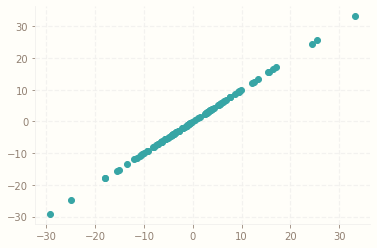

In [23]:
X = torch.randn(100, 1) * 10
y = X
colors = calm_color_generator(1)
plt.plot(X.numpy(), y.numpy(), 'o', c=colors[0])

Text(0.5, 0, 'X')

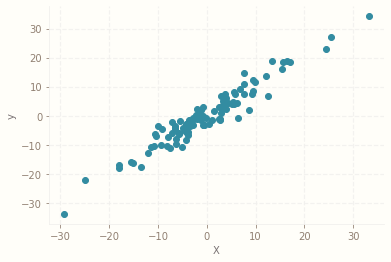

In [24]:
y = X + 3 * torch.randn(100, 1)
colors = calm_color_generator(1)
plt.plot(X.numpy(), y.numpy(), 'o', c=colors[0])
plt.ylabel('y')
plt.xlabel('X')

In [25]:
print(model)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [26]:
[w, b] = model.parameters()
print([w, b])

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [27]:
w1 = w[0][0]
b1 = b[0]
print(w1, b1)

tensor(0.5153, grad_fn=<SelectBackward0>) tensor(-0.4414, grad_fn=<SelectBackward0>)


In [28]:
w1 = w[0][0].item()
b1 = b[0].item()
print(w1, b1)

0.5152631998062134 -0.44137823581695557


In [29]:
def get_params():
    return (w[0][0].item(), b[0].item())

In [30]:
def plot_fit(title):
    plt.title = title
    w1, b1 = get_params()
    x1 = np.array([-30, 30])
    y1 = w1 * x1 + b1
    plt.plot(x1, y1, 'r')
    colors = calm_color_generator(1)
    plt.scatter(X, y, color=colors[0])
    plt.show()

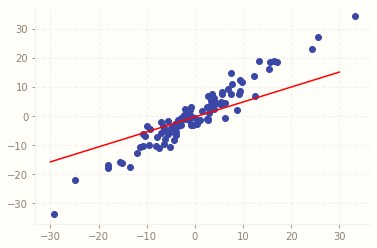

In [31]:
plot_fit("Initial Model")

# Training - Code Implementation

In [32]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.0002)

In [33]:
print(criterion)

MSELoss()


In [34]:
print(optimizer)

SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    lr: 0.0002
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)


In [35]:
epochs = 100
losses = []
termcolors = [
    'grey', 'red', 'green', 'yellow', 'blue', 'magenta', 'cyan', 'white'
]
font_colors = random.choices(termcolors, k=2)
for i in range(epochs):
    i += 1
    y_pred = model.forward(X)
    loss = criterion(y_pred, y)
    if i == 1 or i % 10 == 0:
        print(colored("epoch:", font_colors[0], attrs=['bold']), i,
              colored("loss:", font_colors[1]), loss.item())
        print(colored("weight:", font_colors[1]),
              list(model.parameters())[0][0][0].item(),
              colored("bias:", font_colors[1]),
              list(model.parameters())[1][0].item())
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

NameError: name 'colored' is not defined

In [ ]:
colors = calm_color_generator(1)
plt.plot(range(epochs), losses, c=colors[0])
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [ ]:
plot_fit("Trained Model")